In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse, r2_score as r2
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler


In [ ]:
!wget https://drive.google.com/uc?id=149EjiR3PUEmotXbtfDvYU_hBZPH8Kl3m -O University

--2024-05-18 10:45:17--  https://drive.google.com/uc?id=149EjiR3PUEmotXbtfDvYU_hBZPH8Kl3m
Resolving drive.google.com (drive.google.com)... 74.125.20.139, 74.125.20.100, 74.125.20.102, ...
Connecting to drive.google.com (drive.google.com)|74.125.20.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=149EjiR3PUEmotXbtfDvYU_hBZPH8Kl3m [following]
--2024-05-18 10:45:18--  https://drive.usercontent.google.com/download?id=149EjiR3PUEmotXbtfDvYU_hBZPH8Kl3m
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.99.132, 2607:f8b0:400e:c0c::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.99.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12903 (13K) [application/octet-stream]
Saving to: ‘University’

University          100%[===================>]  12.60K  --.-KB/s    in 0s      

2024-05-18 10:45:18 (77.5 MB/s) - ‘Univers

In [ ]:
data = pd.read_csv('University')
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67




---


**Проведите первичный анализ данных**

In [ ]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


Первичный анализ показал, что в нашем датасете нет пропусков и выбросов

В среднем - абитуриенты хорошо сдали тест на поступление в аспирантуру, хорошо сдали тест по английскому, удовлитворительно написали мотивационное письмо, имели удовлитворительное рекомендательное письмо, показали хороший результат на среднем балле, проводили свои исследования, имеют шанс в 70 проентов на поступление

Университеты - среднего рейтинга

Все фичи - вещественные





---

**Проведите визуальный анализ данных**

Посмотрим, как люди сдавали вступительные и их средний балл

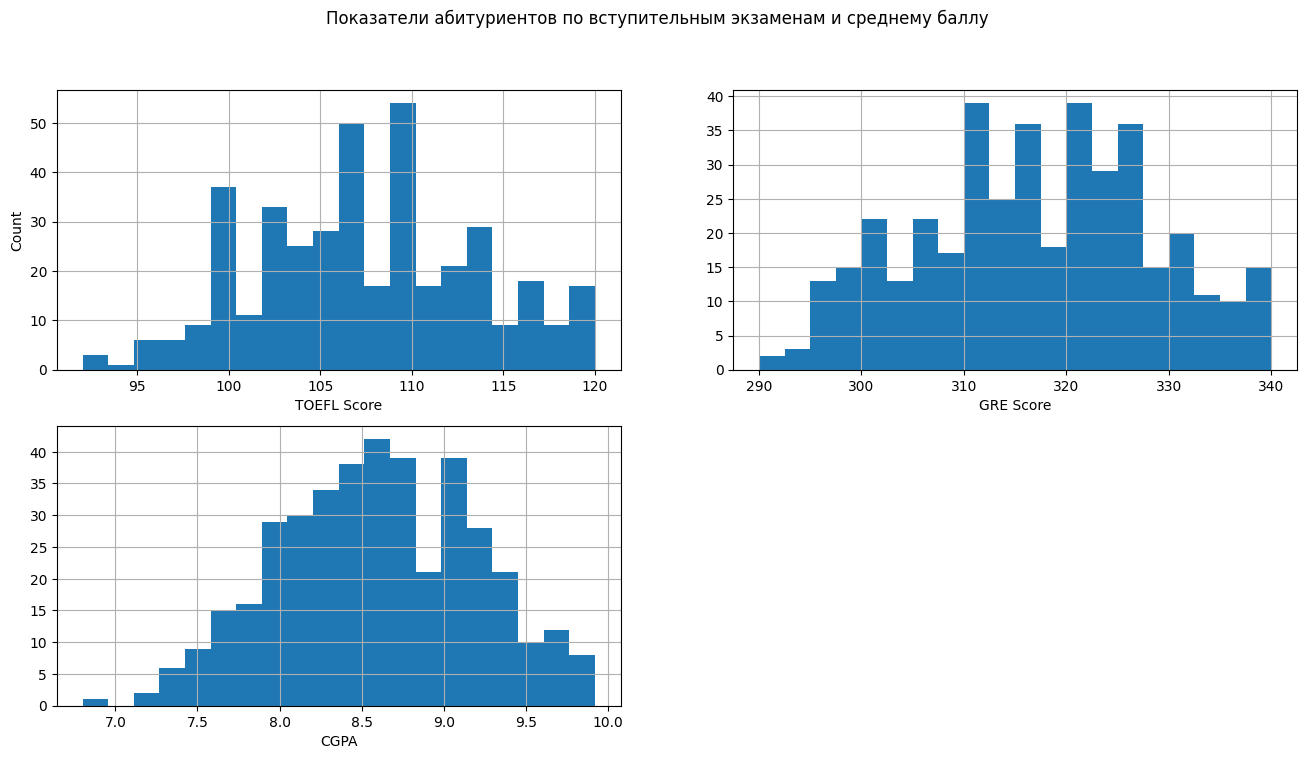

In [ ]:
plt.figure(figsize=(16, 8))

plt.subplot(221)
data['TOEFL Score'].hist(density=False, bins=20)
plt.ylabel('Count')
plt.xlabel('TOEFL Score')

plt.subplot(222)
data['GRE Score'].hist(density=False, bins=20)
plt.xlabel('GRE Score')

plt.subplot(223)
data['CGPA'].hist(density=False, bins=20)
plt.xlabel('CGPA')

plt.suptitle('Показатели абитуриентов по вступительным экзаменам и среднему баллу')
plt.show()

Видим, что в основном студенты, так скажем, все выполнили и учатся на хорошо

Маленьких показателей нет, только данные, где результат немного меньше, чем у остальных



Посмотрим, как абитуриенты написали мотивационное письмо

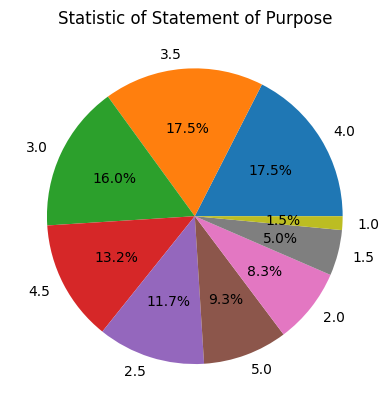

In [ ]:
labels = data['SOP'].value_counts().index
sizes = data['SOP'].value_counts().values

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Statistic of Statement of Purpose');

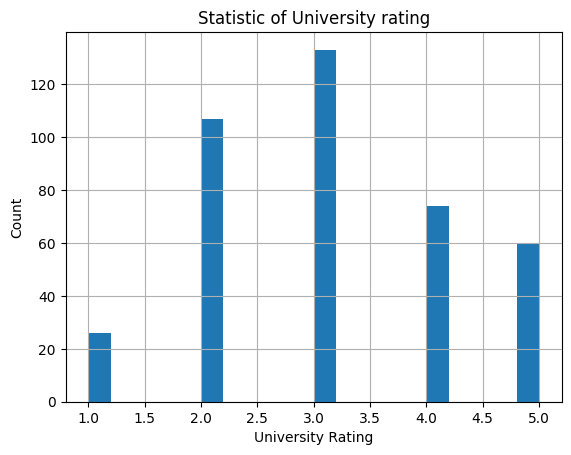

In [ ]:
data['University Rating'].hist(density = False, bins = 20)
plt.xlabel('University Rating')
plt.ylabel('Count')
plt.title('Statistic of University rating');

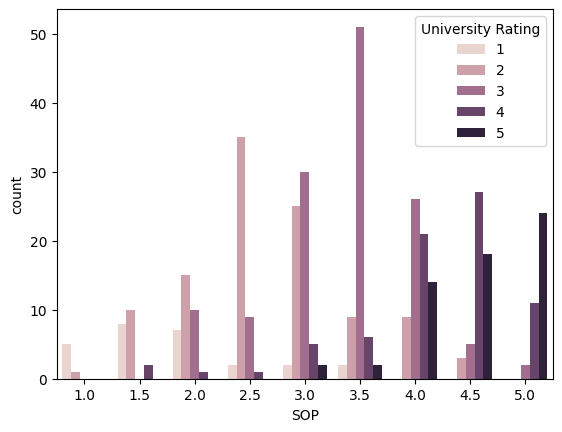

In [ ]:
sns.countplot(x=data['SOP'], hue=data['University Rating']);

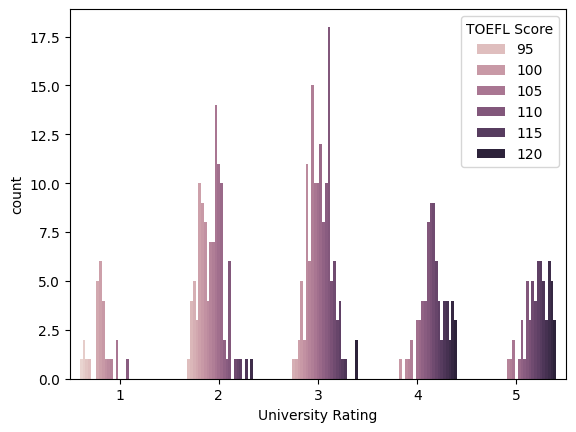

In [ ]:
sns.countplot(x=data['University Rating'], hue=data['TOEFL Score']);

Посмотрим на матрицу корелляций

Видим, что признаки сильно кореллируют между друг другом

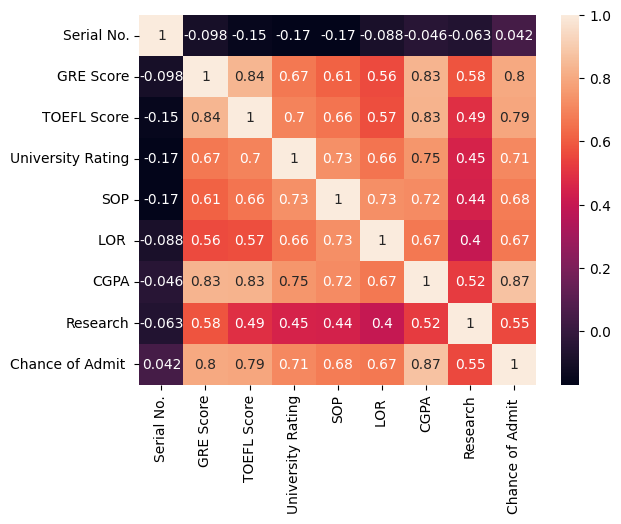

In [ ]:
matrix = data.corr()

sns.heatmap(matrix, annot=True);

Посмотрим, как влияют фичи на наш таргет

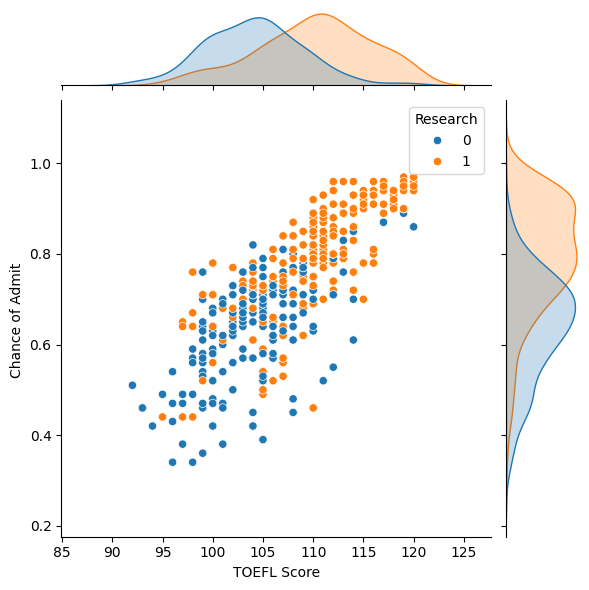

In [ ]:
sns.jointplot(x = data['TOEFL Score'], y = data['Chance of Admit '], data = data, hue="Research");

Анализ показал, что абитуриенты, написавшие вступительный экзамен выше, чем на 110 баллов - имеют собственные исследования, за редким исключением. Это может значить, что собственное исследование напрямую влияет на шанс поступления

Так же видим линейную зависимость таргетной переменной

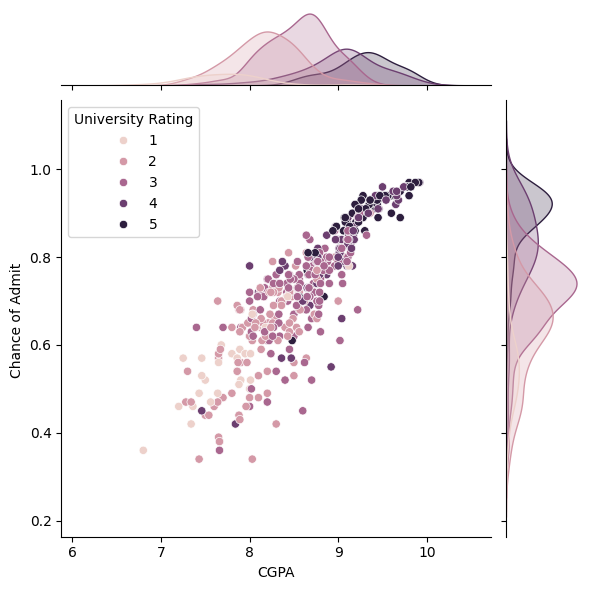

In [ ]:
sns.jointplot(x = data['CGPA'], y = data['Chance of Admit '], data = data, hue="University Rating");

выше на графике показано, что студенты с высоким средним баллом в основном поступают в университеты с хорошим рейтингом.

Можем наблюдать линейную зависимость таргетной переменной

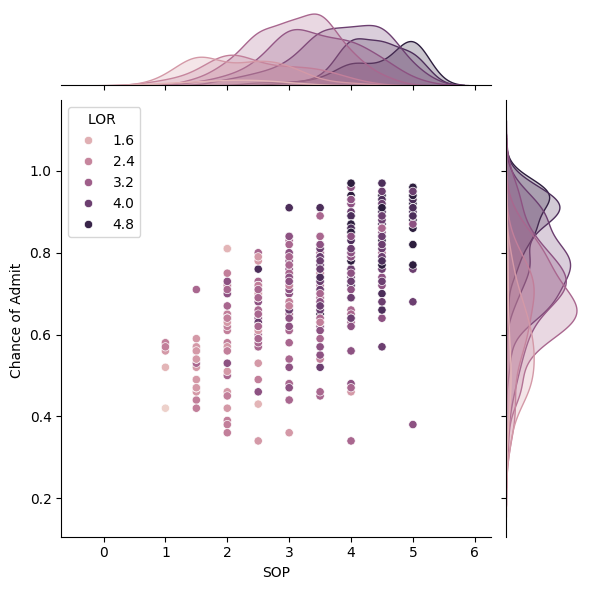

In [ ]:
sns.jointplot(x = data['SOP'], y = data['Chance of Admit '], data = data, hue="LOR ");

Данный график показывает, что студенты с хорошим мотивационным письмом в основном имеют рекомендательное письмо того же уровня

Линейной зависимости не наблюдаем, но видим более сложную зависимость нашего таргета



---


**Разбейте данные на обучение и тест**



In [ ]:
data = data.drop('Serial No.', axis=1)

In [ ]:
x = data.drop('Chance of Admit ', axis=1)
y = data['Chance of Admit ']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle=True, random_state=50)



---

**Обучите модель регрессии, с целевым признаком Chance of Admit (изменяется от 0 до 1).**


In [ ]:
model_lr = LinearRegression()
model_lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_train_pred = model_lr.predict(x_train)
y_test_pred = model_lr.predict(x_test)



---


**Оцените подходящие метрики качества**

In [ ]:
print('RMSE ON TRAIN:', np.sqrt(mse(y_train, y_train_pred)))
print('RMSE ON TEST:', np.sqrt(mse(y_test, y_test_pred)))

print('R^2 ON TRAIN:', r2(y_train, y_train_pred))
print('R^2 ON TEST:', r2(y_test, y_test_pred))


RMSE ON TRAIN: 0.06170757077186717
RMSE ON TEST: 0.06780956130406596
R^2 ON TRAIN: 0.8277700393919402
R^2 ON TEST: 0.7050459756083297


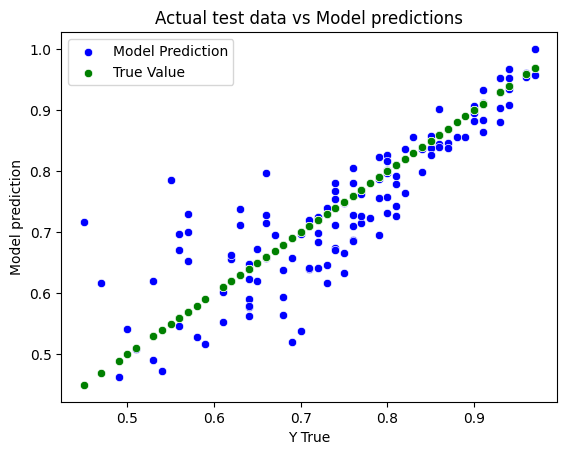

In [ ]:
# Создаем scatter plot для предсказаний модели
sns.scatterplot(x=y_test, y=y_test_pred, color='blue', label='Model Prediction')

# Создаем scatter plot для верных ответов
sns.scatterplot(x=y_test, y=y_test, color='green', label='True Value')

plt.xlabel('Y True')
plt.ylabel('Model prediction')
plt.title('Actual test data vs Model predictions')
plt.legend()
plt.show()


Видим, что у нас нет проблемы переобучения и недообучения, но предсказания модели не так точны

Модель хорошо предсказывали на тренировочной выборке

Попробуем сделать предсказания модели более точными через масштабирование данных, возьмем стандартизацию

In [ ]:
new_x = x_train.columns
new_x

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research'],
      dtype='object')

In [ ]:
scaler = StandardScaler()
x_test_transform = scaler.fit_transform(x_test[new_x])
x_train_transform = scaler.fit_transform(x_train[new_x])


In [ ]:
model_sc = LinearRegression()
model_sc.fit(x_train_transform, y_train)

y_train_predSC = model_sc.predict(x_train)
y_test_predSC = model_sc.predict(x_test)

print('RMSE ON TRAIN:', np.sqrt(mse(y_train, y_train_predSC)))
print('RMSE ON TEST:', np.sqrt(mse(y_test, y_test_predSC)))

print('R^2 ON TRAIN:', r2(y_train, y_train_predSC))
print('R^2 ON TEST:', r2(y_test, y_test_predSC))



RMSE ON TRAIN: 9.53310682713176
RMSE ON TEST: 9.548583860852979
R^2 ON TRAIN: -4109.557443918444
R^2 ON TEST: -5847.579397092582


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


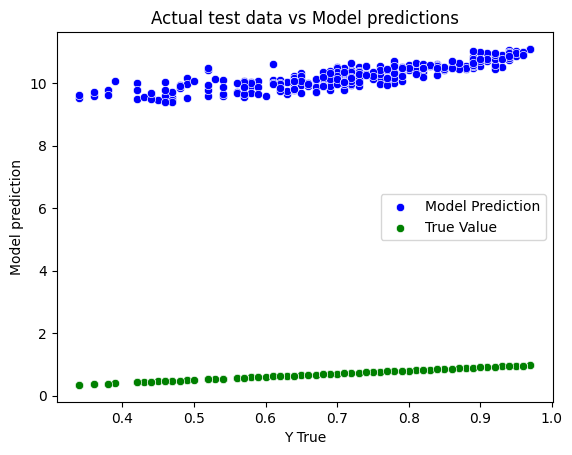

In [ ]:
# Создаем scatter plot для предсказаний модели
sns.scatterplot(x=y_train, y=y_train_predSC, color='blue', label='Model Prediction')

# Создаем scatter plot для верных ответов
sns.scatterplot(x=y_train, y=y_train, color='green', label='True Value')

plt.xlabel('Y True')
plt.ylabel('Model prediction')
plt.title('Actual test data vs Model predictions')
plt.legend()
plt.show()




---

**Выводы**


---



Модель не переобучилась, и не недообучилась, показала хорошие результаты на метрике R^2 и средние на RMSE

Масштабирование данных ухудшило предсказание модели

Можно было надобавлять много новых фичей, поработать с данными еще лучше (в плане масштабирования, оптимизации и тд), но в общем и целом - мы и без того добились неплохих результатов на этом датасете
